In [1]:
import uproot
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time

DDks=uproot.open('/data3/tracking-upgrade-data/dump_comb/DD_ks_moore_big.root:Particle_Data')
DDl=uproot.open('/data3/tracking-upgrade-data/dump_comb/DD_l_moore_big.root:Particle_Data')
GDks=uproot.open('/data3/tracking-upgrade-data/dump_comb/GD_ks_moore_big.root:Particle_Data')
GDl=uproot.open('/data3/tracking-upgrade-data/dump_comb/GD_l_moore_big.root:Particle_Data')



DDvariables=['track_chi2PerDoF','track_nLHCbIDs','track_p','track_phi','track_position_x',
           'track_position_y','track_position_r','track_pt','track_tx','track_ty','track_pseudoRapidity',
           'particle_hasScifi','particle_hasUT','particle_hasVelo','particle_isDown','particle_isDown_noVelo','particle_isLong',
           'particle_isLong_andUT','particle_isElectron']


GDvariables=['track_chi2PerDoF','track_nLHCbIDs','track_p','track_phi','track_position_x',
           'track_position_y','track_position_r','track_pt','track_tx','track_ty','track_pseudoRapidity']



features=['track_chi2PerDoF','track_nLHCbIDs','track_p','track_position_x',
           'track_position_y','track_position_r','track_pt','track_tx','track_ty','track_pseudoRapidity']


tracks=['particle_hasScifi','particle_hasUT','particle_hasVelo','particle_isDown','particle_isDown_noVelo','particle_isLong',
           'particle_isLong_andUT','partiole_isElectron']





DDks_Data=DDks.arrays(DDvariables,library='pd')
DDl_Data=DDl.arrays(DDvariables,library='pd')


GDks_Data=GDks.arrays(GDvariables,library='pd')
GDl_Data=GDl.arrays(GDvariables,library='pd')



DD_data=pd.concat([DDks_Data,DDl_Data]).fillna(False)

GD_data=pd.concat([GDks_Data,GDl_Data]).fillna(False)


DD_data['Ghost']=0
GD_data['Ghost']=1




DD_data=DD_data.loc[(DD_data['track_p']<100e3) & (DD_data['particle_isDown_noVelo']==True) | (DD_data['particle_isLong_andUT']==True) &(DD_data['particle_isElectron']==False)]


GD_data=GD_data.loc[(GD_data['track_p']<100e3)]





CPU times: user 2min 39s, sys: 6.24 s, total: 2min 45s
Wall time: 2min 45s


In [3]:
data=pd.concat([DD_data,GD_data]).fillna(False)

In [4]:
sample=data.drop([ 'particle_hasScifi',
       'particle_hasUT', 'particle_hasVelo', 'particle_isDown',
       'particle_isDown_noVelo', 'particle_isLong', 'particle_isLong_andUT',
       'particle_isElectron', 'Ghost'],axis=1)

[1593904853981052.2, 698954225285304.0, 410448839087780.7, 282194890174820.56, 199667463752027.78, 153386268080183.94, 124239589516558.48, 100957550858807.0, 85697798451584.19]
CPU times: user 2h 2min 54s, sys: 21min 53s, total: 2h 24min 48s
Wall time: 18min 1s


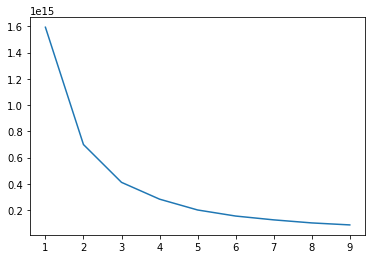

In [5]:
%%time
inertia=[]
value_range=np.arange(1,10)
for i in value_range:
    kmean=KMeans(n_clusters=i)
    kmean.fit(sample)
    inertia.append(kmean.inertia_)

print(inertia)
plt.plot(value_range,inertia)

In [6]:
kmean=KMeans(n_clusters=3)

In [7]:
kmean.fit(sample)

KMeans(n_clusters=3)

In [9]:
data.columns

Index(['track_chi2PerDoF', 'track_nLHCbIDs', 'track_p', 'track_phi',
       'track_position_x', 'track_position_y', 'track_position_r', 'track_pt',
       'track_tx', 'track_ty', 'track_pseudoRapidity', 'particle_hasScifi',
       'particle_hasUT', 'particle_hasVelo', 'particle_isDown',
       'particle_isDown_noVelo', 'particle_isLong', 'particle_isLong_andUT',
       'particle_isElectron', 'Ghost'],
      dtype='object')

In [10]:
data['label']=kmean.labels_

In [12]:

file=uproot.recreate('./clustered_data.root')
file['Particle_Data']=data